# Histogram

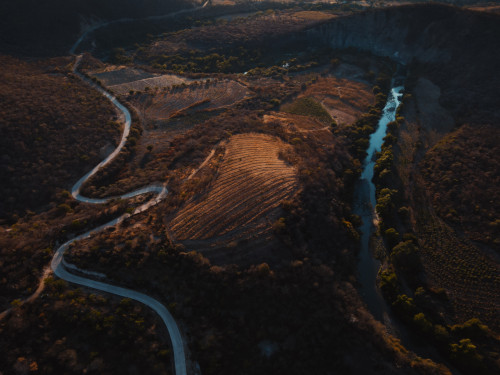

In [1]:
from PIL import Image as im
import numpy as np
import matplotlib.pyplot as plt

image = im.open("demo.jpg")
display(image)

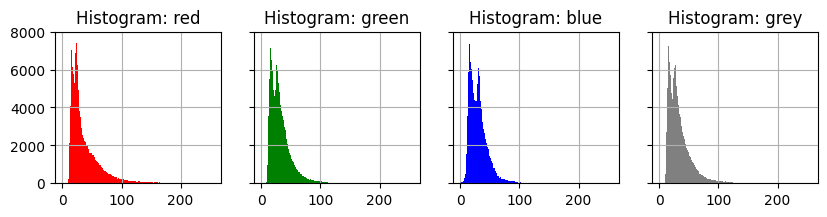

In [2]:
im_matrix = np.array(image)
r = im_matrix[:,:,0]
g = im_matrix[:,:,1]
b = im_matrix[:,:,2]
image_grey = image.convert('L')
grey = np.array(image_grey)

fig, (ax1) = plt.subplots(1,4)
ax1[0].hist(r.flatten(),256, range=[0, 255],color = "red");
ax1[0].set_title('Histogram: red')
ax1[1].hist(g.flatten(),256, range=[0, 255],color = "green");
ax1[1].set_title('Histogram: green')
ax1[2].hist(b.flatten(),256, range=[0, 255],color = "blue");
ax1[2].set_title('Histogram: blue')
ax1[3].hist(grey.flatten(),256, range=[0, 255],color = "grey");
ax1[3].set_title('Histogram: grey')
for ii in range(4):
    ax1[ii].grid()
    ax1[ii].set_ylim([0, 8000])
    if ii > 0:
        ax1[ii].set_yticklabels([])


fig.set_size_inches(25/2.54,5/2.54)


## Histogram Stretching
For each color component or for the grey values, histogram stretching uses the formula 
\begin{align}
    g[x,y] = \frac{f[x,y]-\text{min}(f_[x,y])}{\text{max}(f_[x,y])-\text{min}(f_[x,y])} \cdot \left(2^N - 1 \right)\, .
\end{align}

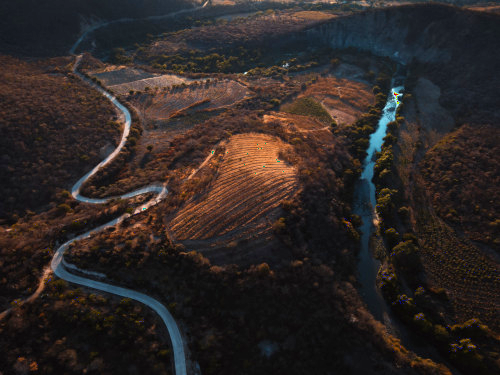

In [3]:
im_matrix_stretch = (im_matrix-np.min(grey))/(np.max(grey)-np.min(grey))*255
image_stretch = im.fromarray(np.array(im_matrix_stretch, dtype=np.uint8))
display(image_stretch)

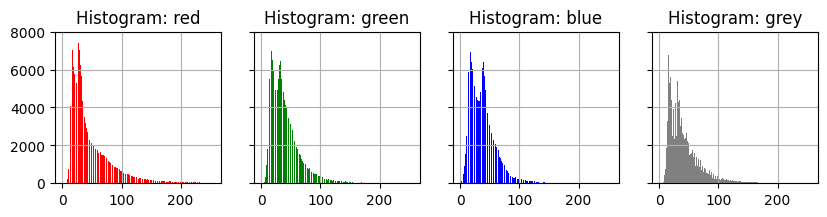

In [4]:
r = im_matrix_stretch[:,:,0]
g = im_matrix_stretch[:,:,1]
b = im_matrix_stretch[:,:,2]
image_grey = image_stretch.convert('L')
grey = np.array(image_grey)

fig, (ax1) = plt.subplots(1,4)
ax1[0].hist(r.flatten(),256, range=[0, 255],color = "red");
ax1[0].set_title('Histogram: red')
ax1[1].hist(g.flatten(),256, range=[0, 255],color = "green");
ax1[1].set_title('Histogram: green')
ax1[2].hist(b.flatten(),256, range=[0, 255],color = "blue");
ax1[2].set_title('Histogram: blue')
ax1[3].hist(grey.flatten(),256, range=[0, 255],color = "grey");
ax1[3].set_title('Histogram: grey')
for ii in range(4):
    ax1[ii].grid()
    ax1[ii].set_ylim([0, 8000])
    if ii > 0:
        ax1[ii].set_yticklabels([])


fig.set_size_inches(25/2.54,5/2.54)

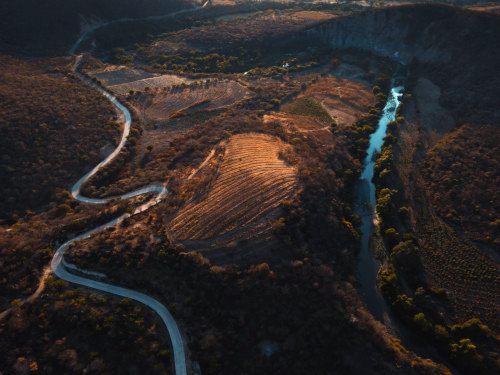

In [5]:
for ii in range(3):
    im_matrix_stretch[:,:,ii] = (im_matrix[:,:,ii]-np.min(im_matrix[:,:,ii]))/(np.max(im_matrix[:,:,ii])-np.min(im_matrix[:,:,ii]))*255
image_stretch = im.fromarray(np.array(im_matrix_stretch, dtype=np.uint8))
display(image_stretch)

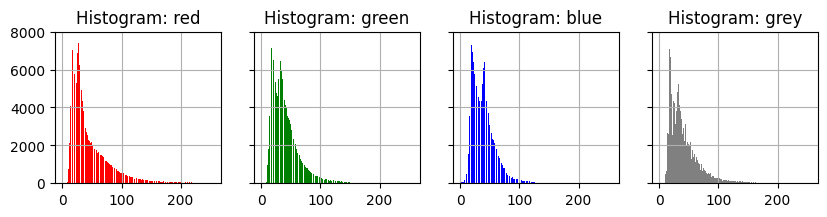

In [6]:
r = im_matrix_stretch[:,:,0]
g = im_matrix_stretch[:,:,1]
b = im_matrix_stretch[:,:,2]
image_grey = image_stretch.convert('L')
grey = np.array(image_grey)

fig, (ax1) = plt.subplots(1,4)
ax1[0].hist(r.flatten(),256, range=[0, 255],color = "red");
ax1[0].set_title('Histogram: red')
ax1[1].hist(g.flatten(),256, range=[0, 255],color = "green");
ax1[1].set_title('Histogram: green')
ax1[2].hist(b.flatten(),256, range=[0, 255],color = "blue");
ax1[2].set_title('Histogram: blue')
ax1[3].hist(grey.flatten(),256, range=[0, 255],color = "grey");
ax1[3].set_title('Histogram: grey')
for ii in range(4):
    ax1[ii].grid()
    ax1[ii].set_ylim([0, 8000])
    if ii > 0:
        ax1[ii].set_yticklabels([])


fig.set_size_inches(25/2.54,5/2.54)

## Histogram Sliding

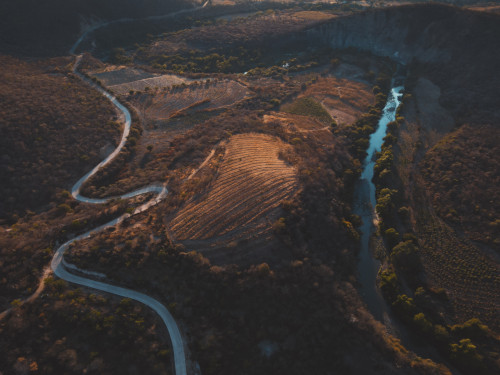

In [7]:
im_matrix_slide = im_matrix + 20
image_slide = im.fromarray(np.array(im_matrix_slide, dtype=np.uint8))
display(image_slide)

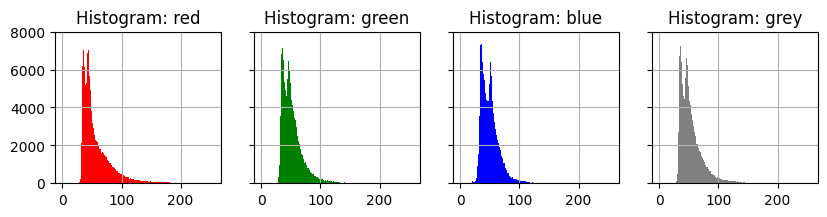

In [8]:
r = im_matrix_slide[:,:,0]
g = im_matrix_slide[:,:,1]
b = im_matrix_slide[:,:,2]
image_grey = image_slide.convert('L')
grey = np.array(image_grey)

fig, (ax1) = plt.subplots(1,4)
ax1[0].hist(r.flatten(),256, range=[0, 255],color = "red");
ax1[0].set_title('Histogram: red')
ax1[1].hist(g.flatten(),256, range=[0, 255],color = "green");
ax1[1].set_title('Histogram: green')
ax1[2].hist(b.flatten(),256, range=[0, 255],color = "blue");
ax1[2].set_title('Histogram: blue')
ax1[3].hist(grey.flatten(),256, range=[0, 255],color = "grey");
ax1[3].set_title('Histogram: grey')
for ii in range(4):
    ax1[ii].grid()
    ax1[ii].set_ylim([0, 8000])
    if ii > 0:
        ax1[ii].set_yticklabels([])


fig.set_size_inches(25/2.54,5/2.54)

## Histogram Equalization

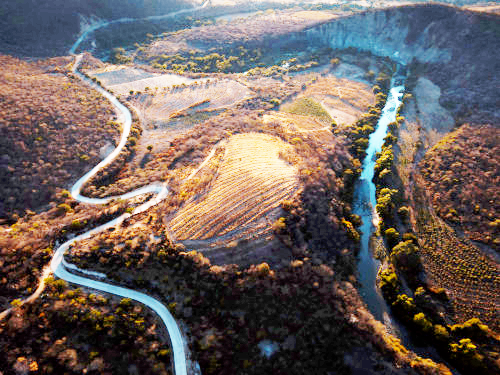

In [9]:
im_matrix = np.array(image)
r = im_matrix[:,:,0]
g = im_matrix[:,:,1]
b = im_matrix[:,:,2]

image_grey = image_stretch.convert('L')
grey = np.array(image_grey)

ghist,bins = np.histogram(grey.flatten(), 256, [0,256])


g_cdf = ghist.cumsum()
g_cdf_m = np.ma.masked_equal(g_cdf,0)
g_cdf_m = (g_cdf_m - g_cdf_m.min())*255/(g_cdf_m.max()-g_cdf_m.min())
g_cdf = np.ma.filled(g_cdf_m,0).astype('uint8')

r2 = g_cdf[r]
g2 = g_cdf[g]
b2 = g_cdf[b]

im_matrix_equalized = im_matrix
im_matrix_equalized[:,:,0] = r2
im_matrix_equalized[:,:,1] = g2
im_matrix_equalized[:,:,2] = b2

image_equalized = im.fromarray(np.array(im_matrix_equalized, dtype=np.uint8))
display(image_equalized)

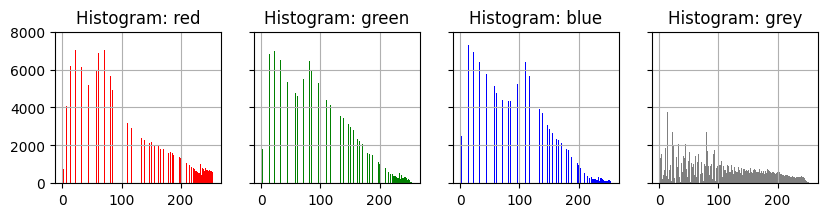

In [10]:
r = im_matrix_equalized[:,:,0]
g = im_matrix_equalized[:,:,1]
b = im_matrix_equalized[:,:,2]
image_grey = image_equalized.convert('L')
grey = np.array(image_grey)

fig, (ax1) = plt.subplots(1,4)
ax1[0].hist(r.flatten(),256, range=[0, 255],color = "red");
ax1[0].set_title('Histogram: red')
ax1[1].hist(g.flatten(),256, range=[0, 255],color = "green");
ax1[1].set_title('Histogram: green')
ax1[2].hist(b.flatten(),256, range=[0, 255],color = "blue");
ax1[2].set_title('Histogram: blue')
ax1[3].hist(grey.flatten(),256, range=[0, 255],color = "grey");
ax1[3].set_title('Histogram: grey')
for ii in range(4):
    ax1[ii].grid()
    ax1[ii].set_ylim([0, 8000])
    if ii > 0:
        ax1[ii].set_yticklabels([])


fig.set_size_inches(25/2.54,5/2.54)

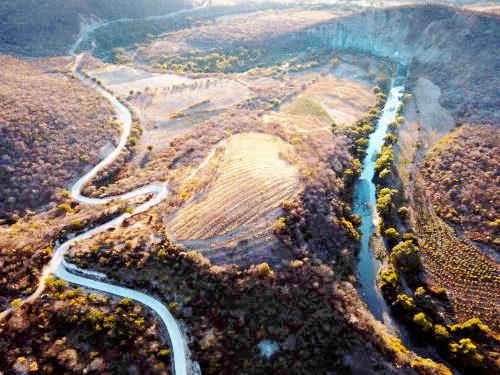

In [11]:
im_matrix = np.array(image)
r = im_matrix[:,:,0]
g = im_matrix[:,:,1]
b = im_matrix[:,:,2]

rhist,bins = np.histogram(r.flatten(), 256, [0,256])
ghist,bins = np.histogram(g.flatten(), 256, [0,256])
bhist,bins = np.histogram(b.flatten(), 256, [0,256])

r_cdf = rhist.cumsum()
r_cdf_m = np.ma.masked_equal(r_cdf,0)
r_cdf_m = (r_cdf_m - r_cdf_m.min())*255/(r_cdf_m.max()-r_cdf_m.min())
r_cdf = np.ma.filled(r_cdf_m,0).astype('uint8')

g_cdf = rhist.cumsum()
g_cdf_m = np.ma.masked_equal(g_cdf,0)
g_cdf_m = (g_cdf_m - g_cdf_m.min())*255/(g_cdf_m.max()-g_cdf_m.min())
g_cdf = np.ma.filled(g_cdf_m,0).astype('uint8')

b_cdf = rhist.cumsum()
b_cdf_m = np.ma.masked_equal(b_cdf,0)
b_cdf_m = (b_cdf_m - b_cdf_m.min())*255/(b_cdf_m.max()-b_cdf_m.min())
b_cdf = np.ma.filled(b_cdf_m,0).astype('uint8')

r2 = r_cdf[r]
g2 = g_cdf[g]
b2 = b_cdf[b]

im_matrix_equalized = im_matrix
im_matrix_equalized[:,:,0] = r2
im_matrix_equalized[:,:,1] = g2
im_matrix_equalized[:,:,2] = b2

image_equalized = im.fromarray(np.array(im_matrix_equalized, dtype=np.uint8))
display(image_equalized)

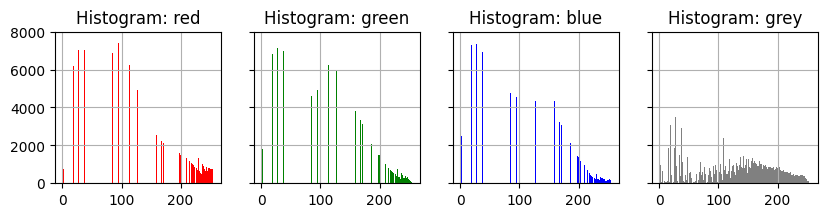

In [12]:
r = im_matrix_equalized[:,:,0]
g = im_matrix_equalized[:,:,1]
b = im_matrix_equalized[:,:,2]
image_grey = image_equalized.convert('L')
grey = np.array(image_grey)

fig, (ax1) = plt.subplots(1,4)
ax1[0].hist(r.flatten(),256, range=[0, 255],color = "red");
ax1[0].set_title('Histogram: red')
ax1[1].hist(g.flatten(),256, range=[0, 255],color = "green");
ax1[1].set_title('Histogram: green')
ax1[2].hist(b.flatten(),256, range=[0, 255],color = "blue");
ax1[2].set_title('Histogram: blue')
ax1[3].hist(grey.flatten(),256, range=[0, 255],color = "grey");
ax1[3].set_title('Histogram: grey')
for ii in range(4):
    ax1[ii].grid()
    ax1[ii].set_ylim([0, 8000])
    if ii > 0:
        ax1[ii].set_yticklabels([])


fig.set_size_inches(25/2.54,5/2.54)